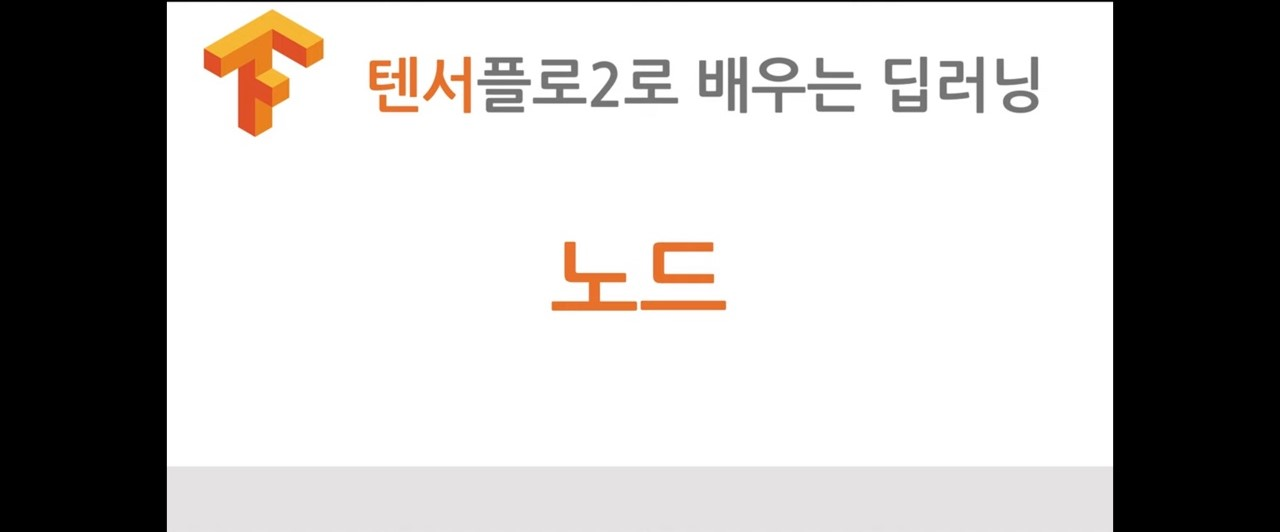

In [29]:
from IPython.display import Image
Image('c:/node_img/node01.jpg', width = 700)

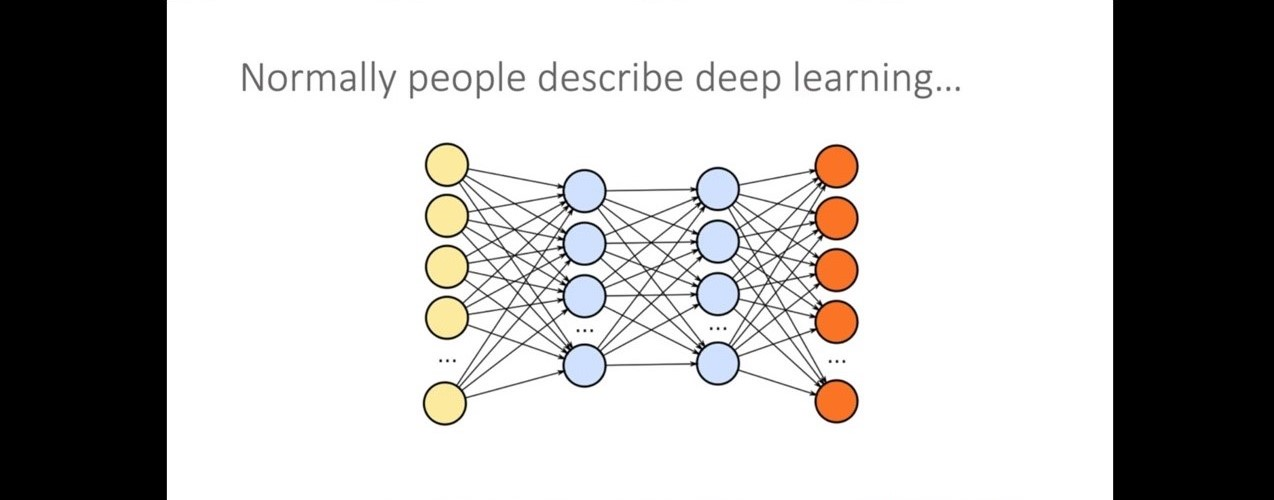

In [2]:
Image('c:/node_img/node02.jpg', width = 700)

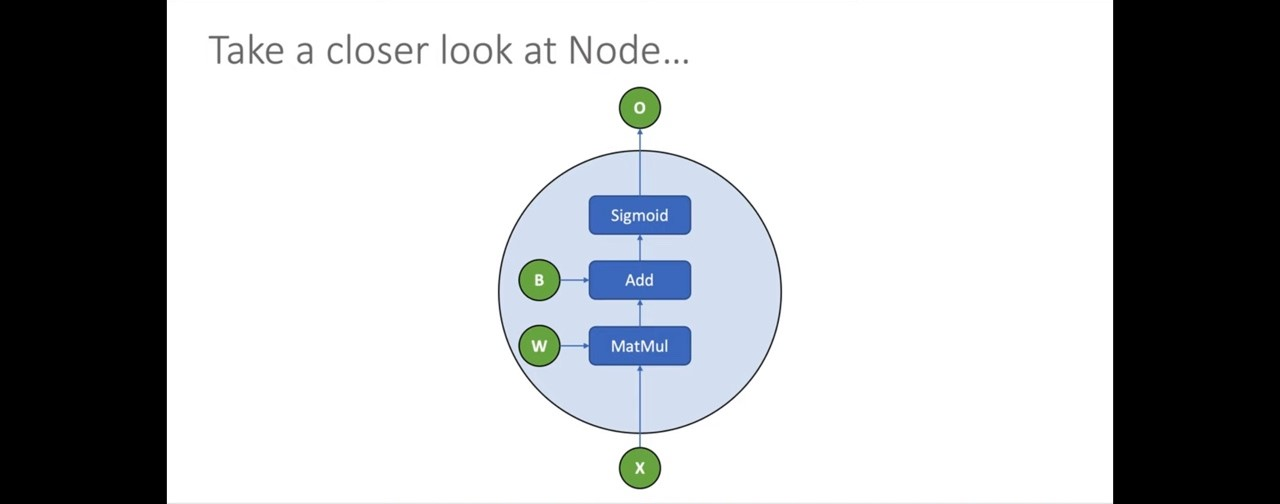

In [3]:
Image('c:/node_img/node06.jpg', width = 700)

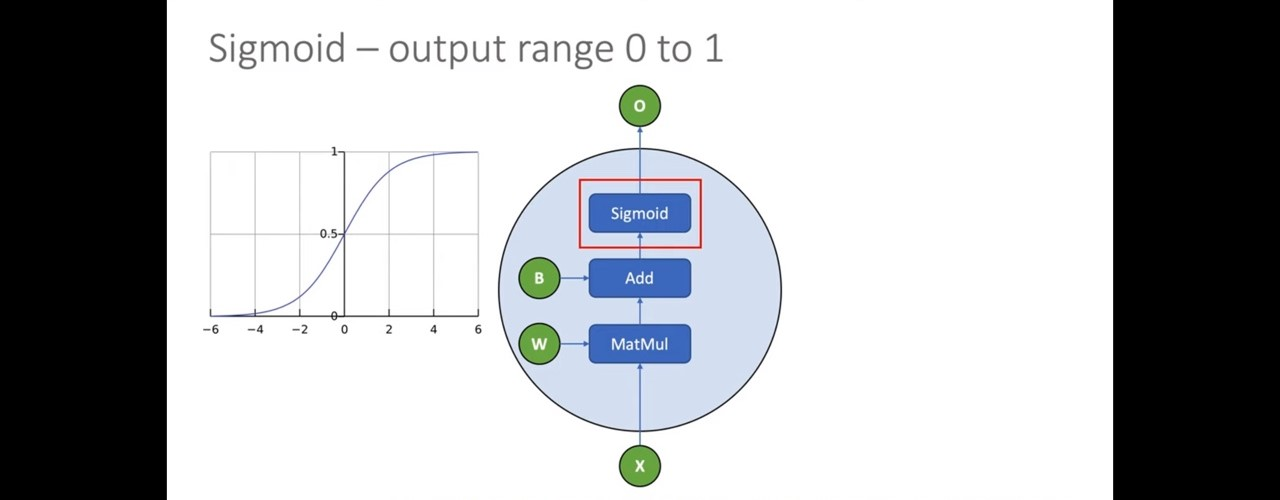

In [4]:
Image('c:/node_img/node07.jpg', width = 700)

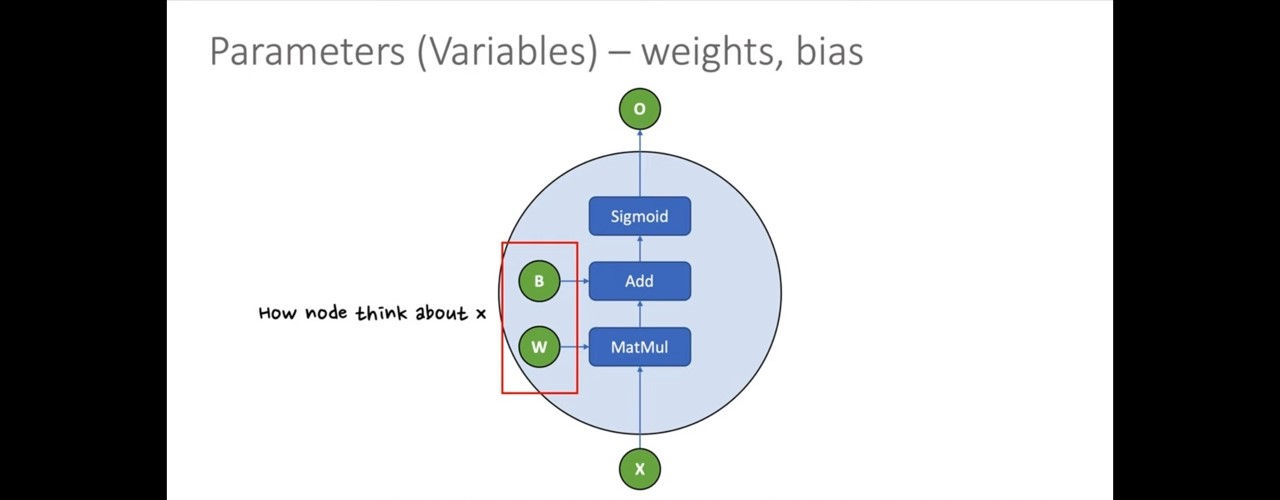

In [5]:
Image('c:/node_img/node08.jpg', width = 700)

In [4]:
import tensorflow as tf
from   tensorflow import keras


import numpy as np
import pandas as pd 

print(tf.__version__)
print(keras.__version__)

2.2.0
2.3.0-tf


#### 데이터 로드

In [5]:
(x_train, y_train) , (x_test , y_test) = keras.datasets.mnist.load_data()

In [6]:
x_train.shape , y_train.shape , x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
for idx in range(10) :
    print(y_train[idx])

5
0
4
1
9
2
1
3
1
4


In [8]:
y_train = keras.utils.to_categorical(y_train , 10)
y_test = keras.utils.to_categorical(y_test , 10)

In [9]:
for idx in range(10) :
    print(y_train[idx])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [10]:
x_train = x_train.reshape(60000 , 784)
x_test  = x_test.reshape(10000 , 784)

In [11]:
x_train.shape , y_train.shape , x_test.shape, y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

#### 모델 만들기

In [12]:
model = keras.Sequential()

model.add( keras.layers.Dense(256  , activation='sigmoid' , input_shape=(784 , ) , name='input' ) )

model.add( keras.layers.Dense(128  , activation='sigmoid' , name='hidden1' ) )
model.add( keras.layers.Dense(64  ,  activation='sigmoid' , name='hidden2' ) )
model.add( keras.layers.Dense(32  ,  activation='sigmoid' , name='hidden3' ) )

model.add( keras.layers.Dense(10  ,  activation='softmax' , name='output' ) )


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 256)               200960    
_________________________________________________________________
hidden1 (Dense)              (None, 128)               32896     
_________________________________________________________________
hidden2 (Dense)              (None, 64)                8256      
_________________________________________________________________
hidden3 (Dense)              (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________


#### 모델 컴파일

In [14]:
optimizer = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer = optimizer, 
              loss      = 'categorical_crossentropy' , 
              metrics   = ['accuracy'] ) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 256)               200960    
_________________________________________________________________
hidden1 (Dense)              (None, 128)               32896     
_________________________________________________________________
hidden2 (Dense)              (None, 64)                8256      
_________________________________________________________________
hidden3 (Dense)              (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________


#### 학습

In [16]:
history = model.fit(x_train, y_train , batch_size = 128 , epochs = 10 , validation_data=(x_test, y_test) )

Epoch 1/10
469/469 [==============================] - 1s 3ms/step - loss: 1.9219 - accuracy: 0.3943 - val_loss: 1.8475 - val_accuracy: 0.3967
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 1.7825 - accuracy: 0.4158 - val_loss: 1.7089 - val_accuracy: 0.4361
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 1.6481 - accuracy: 0.4618 - val_loss: 1.5811 - val_accuracy: 0.4741
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 1.5284 - accuracy: 0.5041 - val_loss: 1.4703 - val_accuracy: 0.5263
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 1.4237 - accuracy: 0.5595 - val_loss: 1.3716 - val_accuracy: 0.5723
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 1.3307 - accuracy: 0.6116 - val_loss: 1.2851 - val_accuracy: 0.6359
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 1.2481 - accuracy: 0.6649 - val_loss: 1.2077 - val_accuracy: 0.6720
Epoch 

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### 평가

In [18]:
model.evaluate(x_test , y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.0087 - accuracy: 0.7719


[1.0086544752120972, 0.7718999981880188]

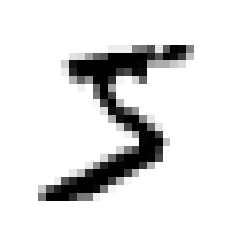

In [25]:
import matplotlib.pyplot as plt

x_train = x_train.reshape(60000 , 28, 28)

plt.figure()
plt.imshow(x_train[0] , cmap=plt.cm.binary)
#plt.colorbar()
plt.grid(False)
plt.axis('off')
plt.show()

In [27]:
# 데이터로드 부터 다시한번

(x_train, y_train) , (x_test , y_test) = keras.datasets.mnist.load_data()
x_train.shape , y_train.shape , x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

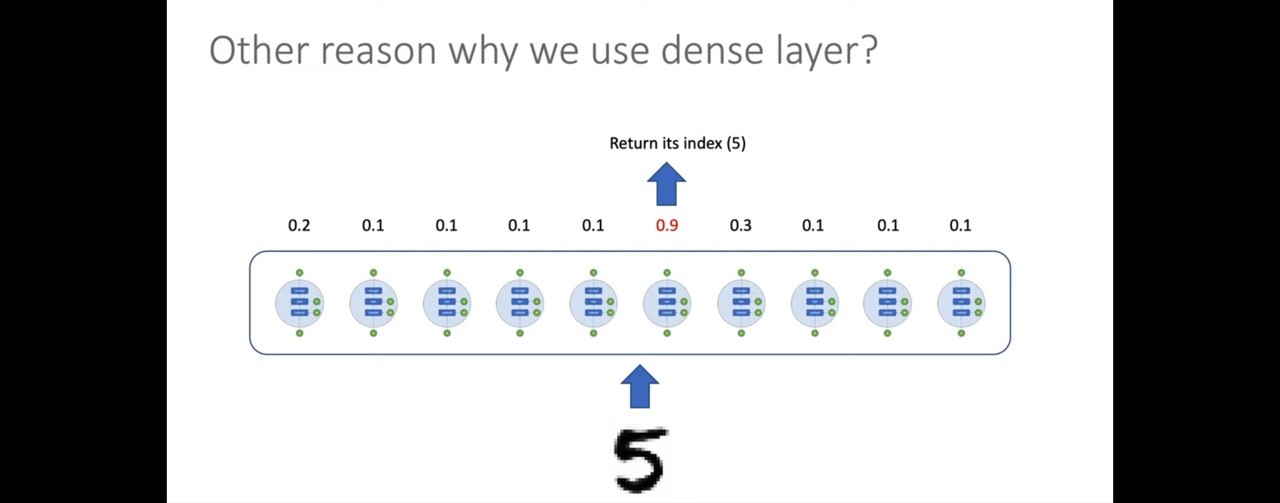

In [30]:
Image('c:/dense_layer_img/layer21.jpg', width = 700)

In [31]:
y_train = keras.utils.to_categorical(y_train , 10)
y_test = keras.utils.to_categorical(y_test , 10)

In [32]:
x_train = x_train.reshape(60000 , 784)
x_test  = x_test.reshape(10000 , 784)

In [33]:
x_train.shape , y_train.shape , x_test.shape, y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

In [34]:
from sklearn.model_selection import train_test_split

x_train , x_val , y_train , y_val = train_test_split(x_train, y_train , 
                                                     test_size = 0.3 ,
                                                     random_state = 100)

In [35]:
x_train.shape , x_val.shape , y_train.shape , y_val.shape

((42000, 784), (18000, 784), (42000, 10), (18000, 10))

#### 모델을 구성하는 두번재 방법
- 함수형 API

In [37]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential , Model

input   = Input(shape=(784, ) , name='input')

hidden1 = Dense(256  , activation='sigmoid' , name='hidden1' )(input)
hidden2 = Dense(128  , activation='sigmoid' , name='hidden2' )(hidden1)
hidden3 = Dense(64  ,  activation='sigmoid' , name='hidden3' )(hidden2)
hidden4 = Dense(32  ,  activation='sigmoid' , name='hidden4' )(hidden3)

output  = Dense(10  ,  activation='softmax' , name='output' )(hidden4)

model   = Model(inputs=[input] , outputs=[output]) 


In [38]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
hidden1 (Dense)              (None, 256)               200960    
_________________________________________________________________
hidden2 (Dense)              (None, 128)               32896     
_________________________________________________________________
hidden3 (Dense)              (None, 64)                8256      
_________________________________________________________________
hidden4 (Dense)              (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_______________________________________________________

In [41]:
from tensorflow.keras.optimizers import SGD

optimizer = SGD(learning_rate=0.01)
model.compile(optimizer = optimizer, 
              loss      = 'categorical_crossentropy' , 
              metrics   = ['accuracy'] ) 

In [64]:
history = model.fit(x_train, y_train , batch_size = 128 , epochs = 10 , validation_data=(x_val, y_val) )

Epoch 1/10
329/329 [==============================] - 1s 4ms/step - loss: 0.1095 - accuracy: 0.9772 - val_loss: 0.2370 - val_accuracy: 0.9386
Epoch 2/10
329/329 [==============================] - 2s 5ms/step - loss: 0.1104 - accuracy: 0.9762 - val_loss: 0.2402 - val_accuracy: 0.9390
Epoch 3/10
329/329 [==============================] - 1s 4ms/step - loss: 0.1059 - accuracy: 0.9775 - val_loss: 0.2411 - val_accuracy: 0.9381
Epoch 4/10
329/329 [==============================] - 1s 4ms/step - loss: 0.1029 - accuracy: 0.9792 - val_loss: 0.2332 - val_accuracy: 0.9418
Epoch 5/10
329/329 [==============================] - 1s 4ms/step - loss: 0.1056 - accuracy: 0.9777 - val_loss: 0.2313 - val_accuracy: 0.9417
Epoch 6/10
329/329 [==============================] - 1s 4ms/step - loss: 0.0992 - accuracy: 0.9798 - val_loss: 0.2271 - val_accuracy: 0.9432
Epoch 7/10
329/329 [==============================] - 1s 4ms/step - loss: 0.0984 - accuracy: 0.9800 - val_loss: 0.2290 - val_accuracy: 0.9418
Epoch 

In [59]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [48]:
history_dict = history.history


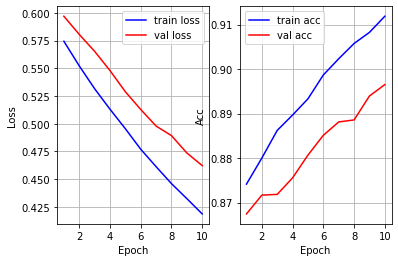

In [54]:
loss     = history_dict['loss'] 
val_loss = history_dict['val_loss']

fig = plt.figure()
ax01 = fig.add_subplot(1, 2 , 1) 

epochs = range(1, len(loss)+1)

ax01.plot(epochs , loss ,     color='blue' , label='train loss')
ax01.plot(epochs , val_loss , color='red'  , label='val loss')
ax01.set_xlabel('Epoch')
ax01.set_ylabel('Loss')
ax01.grid()
ax01.legend()


acc     = history_dict['accuracy'] 
val_acc = history_dict['val_accuracy']

ax02 = fig.add_subplot(1, 2 , 2) 
ax02.plot(epochs , acc ,     color='blue' , label='train acc')
ax02.plot(epochs , val_acc , color='red'  , label='val acc')
ax02.set_xlabel('Epoch')
ax02.set_ylabel('Acc')
ax02.grid()
ax02.legend()



In [55]:
model.evaluate(x_test , y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4539 - accuracy: 0.9002


[0.4538777768611908, 0.9002000093460083]